In [2]:

import networkx as nx
import EoN
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import copy

# Fijando los parametros del modelo.


In [3]:
tau = 0.3#transmission rate
gamma = 1.0 #recovery rate

rho = 0.005#initial fraction infected


# Funciones Propias Auxiliares Utiles

In [4]:
#Codigo para partir las simulaciones


def get_listados_nodos_a_tiempo(simulacion, tiempo):
    
    estados = simulacion.get_statuses(time=tiempo)
    #dictionario nodo: status

    susceptibles = []
    infectados = []
    recuperados = []

    #print(type(estados[0]))

    for nodo in estados.keys():
        status = estados[nodo]
        if(status == 'S'):
            susceptibles.append(nodo)
        elif(status == 'I'):
            infectados.append(nodo)
        else:
            recuperados.append(nodo)
            
    return susceptibles,infectados, recuperados


In [5]:
# Función que elimina enlaces
def elimina_enlaces(grafo,prob):
    """
        Probabilidad con la que eliminar un enlace con porbabilidad uniforme
    """
    
    
    for edge in list(grafo.edges):
        
        r= np.random.uniform(0, 1)
        if(r<= prob):
            u,v = edge
            grafo.remove_edge(u,v)



    return grafo


In [6]:

def encuentra_tiempo_limite_alcanzado(tabla_tiempos,tabla_infectados, limite):
    """
        Encuentra el primer tiempo t a partir del cual el numero de infectados >= limite
    """
    
    assert len(tabla_tiempos) == len(tabla_infectados), "Las tablas deben de tener le mismo tamaño"
    
    index = -1
    
    for i in range(len(tabla_infectados)):
        if(tabla_infectados[i]>= limite):
            index = i
            break
            
    if(index==-1):
        print("ATENCION: El limite no se supera!")
        return -1
    else:
        print("El limite se supera en:", tabla_tiempos[index])
        print("El index es: ", index)
        return tabla_tiempos[index]
        
        

# Simulaciones con diferentes probabilidades y t=1.80 fijado

In [8]:
#listado de tiempos en los que partir la simulacion para modificar el grafo
#con prob = 0.5
listado_de_tiempos_en_donde_partir = []
listado_de_tiempos_en_donde_partir.append(0.357 )
listado_de_tiempos_en_donde_partir.append(0.988 )
listado_de_tiempos_en_donde_partir.append(1.302 )
listado_de_tiempos_en_donde_partir.append(1.537 )
listado_de_tiempos_en_donde_partir.append(1.809 )
listado_de_tiempos_en_donde_partir.append(2.185 )
listado_de_tiempos_en_donde_partir.append(2.537 )
listado_de_tiempos_en_donde_partir.append(3.152 )
#listado_de_tiempos_en_donde_partir.append(999999999999999)#infinito seria equivalente a no tomar medidas




sim_erdosrenyi_1M_part1_ejem3 = np.empty([10],dtype=object)

tiempos_parte1_ejem3 = np.empty([10],dtype=object)
estados_parte1_ejem3 = np.empty([10],dtype=object)
infectados_parte1_ejem3 = np.empty([10],dtype=object)


tiempos_parte2_ejem3 = np.empty([10],dtype=object)
infectados_parte2_ejem3 = np.empty([10],dtype=object)
prob = 0.5 #probabilidad de borrar un enlace




tiempos_finales_ejem3 = np.empty([10],dtype=object)
infectados_finales_ejem3 = np.empty([10],dtype=object)


#Erdos-renyi
N = 10**5#number of individuals
kave = 10#expected number of partners
g_erdosrenyi_1M_ejem3 = nx.fast_gnp_random_graph(N, kave/(N-1))#Erdo's-Re'nyi graph
print('Generated graph G with {} nodes'.format(N))
print('Generated graph G with  edges', len(list(g_erdosrenyi_1M_ejem3.edges))," enlaces")



grafo_original = g_erdosrenyi_1M_ejem3

for i in range(0,len(listado_de_tiempos_en_donde_partir)):   

   

    

    grafo_copia = grafo_original.copy()
    g_erdosrenyi_1M_ejem3 = grafo_copia
    print("Copia de grafo finalizada, iteración i=",i)


    #-----------------SIMULACION PARTE 1
    sim_erdosrenyi_1M_part1_ejem3[i]= EoN.fast_SIR(g_erdosrenyi_1M_ejem3, tau, gamma, rho=rho, return_full_data = True)
    #print("Simulacion  parte 1 finalizada")
    #Esto lo haria para quedarme con la evolucion de la grafica hasta el tiempo t
    tiempos_parte1_ejem3[i], estados_parte1_ejem3[i]= sim_erdosrenyi_1M_part1_ejem3[i].summary()
    infectados_parte1_ejem3[i] = estados_parte1_ejem3[i]['I']
    #A partir de tiempo t, cojo los nodos que se encuentran en cada estado

    tiempo=listado_de_tiempos_en_donde_partir[i]
    print("-->Se toman medias sobre el grafo en tiempo t= ",tiempo)
    simulacion = sim_erdosrenyi_1M_part1_ejem3[i]
    susceptibles_ejem3,infectados_ejem3, recuperados_ejem3 = get_listados_nodos_a_tiempo(simulacion, tiempo)



   


    #--------------SIMULACION PARTE 2

    #Modifico en grafo

    np.random.seed (123) #Semilla para la simluacion



    g_erdosrenyi_1M_ejem3 = elimina_enlaces(g_erdosrenyi_1M_ejem3,prob)

    
    
    
    #simulo de nuevo(ofo con paserle bien las proporciones que no lo comprueba)
    sim_erdosrenyi_1M_part2_ejem3= EoN.fast_SIR(g_erdosrenyi_1M_ejem3, tau, gamma,  return_full_data = True, initial_infecteds=infectados_ejem3, initial_recovereds=recuperados_ejem3 )
    #print("Simulacion parte 2 finalizada")

    tiempos_parte2_ejem3[i] , estados_parte2_ejem3= sim_erdosrenyi_1M_part2_ejem3.summary()
    tiempos_parte2_ejem3[i]  = tiempos_parte2_ejem3[i] [1:] #ya que en tiempo 0 hay 0 infectados
    tiempos_parte2_ejem3[i]  = [x + tiempo for x in tiempos_parte2_ejem3[i] ] # desplazamos los tiempos desde timepo
    infectados_parte2_ejem3[i] = estados_parte2_ejem3['I']
    infectados_parte2_ejem3[i] = infectados_parte2_ejem3[i][1:] #ya que en tiempo 0 hay 0 infectados



    #Reconpongo la parte1 de tiempos (hasta tiempo) con la parte2(entera), ojo esto tiene que ser asi
    index = 0
    while(tiempo > tiempos_parte1_ejem3[i][index]):
        index +=1


    tiempos_finales_ejem3[i]= list(tiempos_parte1_ejem3[i][:index+1]) + list(tiempos_parte2_ejem3[i])
    infectados_finales_ejem3[i] = list(infectados_parte1_ejem3[i][:index+1]) + list(infectados_parte2_ejem3[i])



    print("----->Simulacion ", i, "completada")

    
print("Fin de todas las simulaciones")

Generated graph G with 100000 nodes
Generated graph G with  edges 499853  enlaces
Copia de grafo finalizada, iteración i= 0
-->Se toman medias sobre el grafo en tiempo t=  0.357
----->Simulacion  0 completada
Copia de grafo finalizada, iteración i= 1
-->Se toman medias sobre el grafo en tiempo t=  0.988
----->Simulacion  1 completada
Copia de grafo finalizada, iteración i= 2
-->Se toman medias sobre el grafo en tiempo t=  1.302
----->Simulacion  2 completada
Copia de grafo finalizada, iteración i= 3
-->Se toman medias sobre el grafo en tiempo t=  1.537
----->Simulacion  3 completada
Copia de grafo finalizada, iteración i= 4
-->Se toman medias sobre el grafo en tiempo t=  1.809
----->Simulacion  4 completada
Copia de grafo finalizada, iteración i= 5
-->Se toman medias sobre el grafo en tiempo t=  2.185
----->Simulacion  5 completada
Copia de grafo finalizada, iteración i= 6
-->Se toman medias sobre el grafo en tiempo t=  2.537
----->Simulacion  6 completada
Copia de grafo finalizada, it

# GRAFICAS


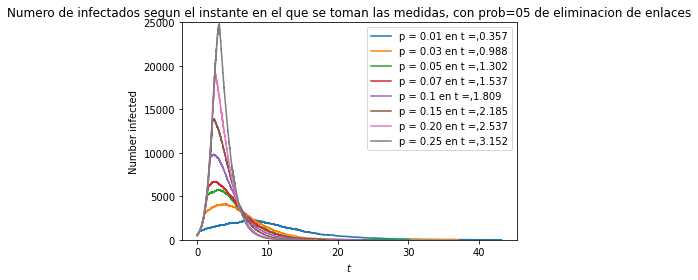

In [42]:
#Representacion

#Pintamos solo la parte 1 de la simulacion


#Pintamos solo la parte 2 de la simulacion 
label0 = "p = 0.01 en t =," + str(listado_de_tiempos_en_donde_partir[0])
label1 = "p = 0.03 en t =,"+str(listado_de_tiempos_en_donde_partir[1])
label2 = "p = 0.05 en t =,"+str(listado_de_tiempos_en_donde_partir[2])
label3 = "p = 0.07 en t =,"+str(listado_de_tiempos_en_donde_partir[3])
label4 = "p = 0.1 en t =,"+str(listado_de_tiempos_en_donde_partir[4])
label5 = "p = 0.15 en t =,"+str(listado_de_tiempos_en_donde_partir[5])
label6 = "p = 0.20 en t =,"+str(listado_de_tiempos_en_donde_partir[6])
label7 = "p = 0.25 en t =,"+str(listado_de_tiempos_en_donde_partir[7])


plt.plot(tiempos_finales_ejem3[0],infectados_finales_ejem3[0] , label = label0)
plt.plot(tiempos_finales_ejem3[1],infectados_finales_ejem3[1] , label = label1)
plt.plot(tiempos_finales_ejem3[2],infectados_finales_ejem3[2] , label = label2)
plt.plot(tiempos_finales_ejem3[3],infectados_finales_ejem3[3] , label =label3)
plt.plot(tiempos_finales_ejem3[4],infectados_finales_ejem3[4] , label = label4)
plt.plot(tiempos_finales_ejem3[5],infectados_finales_ejem3[5] , label = label5)
plt.plot(tiempos_finales_ejem3[6],infectados_finales_ejem3[6] , label = label6)
plt.plot(tiempos_finales_ejem3[7],infectados_finales_ejem3[7] , label = label7)



axes = plt.gca()
axes.set_ylim([0,25000])


plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.title('Numero de infectados segun el instante en el que se toman las medidas, con prob=05 de eliminacion de enlaces')
plt.legend()
plt.show()

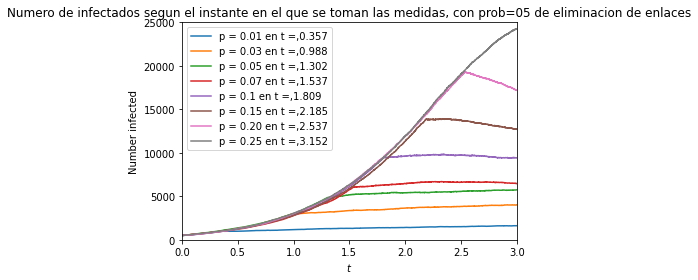

In [43]:
#Representacion

#Pintamos solo la parte 1 de la simulacion


#Pintamos solo la parte 2 de la simulacion 
label0 = "p = 0.01 en t =," + str(listado_de_tiempos_en_donde_partir[0])
label1 = "p = 0.03 en t =,"+str(listado_de_tiempos_en_donde_partir[1])
label2 = "p = 0.05 en t =,"+str(listado_de_tiempos_en_donde_partir[2])
label3 = "p = 0.07 en t =,"+str(listado_de_tiempos_en_donde_partir[3])
label4 = "p = 0.1 en t =,"+str(listado_de_tiempos_en_donde_partir[4])
label5 = "p = 0.15 en t =,"+str(listado_de_tiempos_en_donde_partir[5])
label6 = "p = 0.20 en t =,"+str(listado_de_tiempos_en_donde_partir[6])
label7 = "p = 0.25 en t =,"+str(listado_de_tiempos_en_donde_partir[7])


plt.plot(tiempos_finales_ejem3[0],infectados_finales_ejem3[0] , label = label0)
plt.plot(tiempos_finales_ejem3[1],infectados_finales_ejem3[1] , label = label1)
plt.plot(tiempos_finales_ejem3[2],infectados_finales_ejem3[2] , label = label2)
plt.plot(tiempos_finales_ejem3[3],infectados_finales_ejem3[3] , label =label3)
plt.plot(tiempos_finales_ejem3[4],infectados_finales_ejem3[4] , label = label4)
plt.plot(tiempos_finales_ejem3[5],infectados_finales_ejem3[5] , label = label5)
plt.plot(tiempos_finales_ejem3[6],infectados_finales_ejem3[6] , label = label6)
plt.plot(tiempos_finales_ejem3[7],infectados_finales_ejem3[7] , label = label7)



axes = plt.gca()
axes.set_ylim([0,25000])
axes.set_xlim([0,3])


plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.title('Numero de infectados segun el instante en el que se toman las medidas, con prob=05 de eliminacion de enlaces')
plt.legend()
plt.show()